In [2]:
import random

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
DATA_DIR = "../data/"

In [5]:
# Here we are working with a csv copy of train_FD001.txt

train_df = pd.read_csv(DATA_DIR+'train.csv', header=None)

train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

train_df.head(10)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [10]:
train_df.groupby(['id']).agg(['count']).reset_index()[['id', 'cycle']]

,id,cycle
,,count
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
5,6,188
6,7,259
7,8,150
8,9,201


In [7]:
# Count the number of engines
num_engines = train_df.groupby(['id']).count().shape[0]
print("Number of training engines: ", num_engines)

Number of training engines:  100


Min cycle length: 128
Max cycle length: 362
Avg cycle length: 206.31


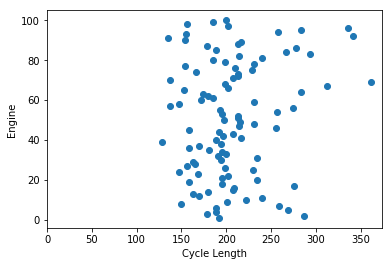

In [8]:
train_cycles = train_df.groupby(['id']).count()['cycle'].values

print("Min cycle length:", np.min(train_cycles))
print("Max cycle length:", np.max(train_cycles))
print("Avg cycle length:", np.average(train_cycles))

engine_ids = np.arange(1, num_engines+1)

plt.scatter( train_cycles, engine_ids)
plt.xlim(0)
plt.xlabel("Cycle Length")
plt.ylabel("Engine")
plt.show()

Check out the correlation between feilds using pandas and display using seaborn

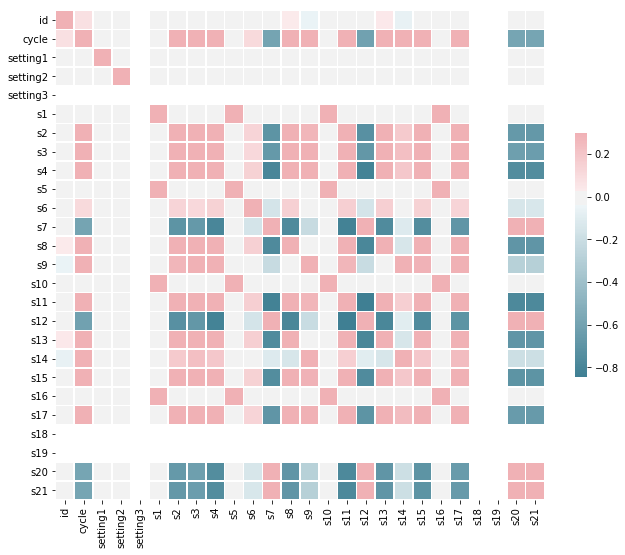

In [7]:
corr = train_df.corr()
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
# Three operational setting columns
setting_cols = ['setting' + str(i) for i in range(1,4)]

# Twenty one sensor columns
sensor_cols = ['s' + str(i) for i in range(1,22)]

def display_data(df, engine_id, col_names, rul=None):
    
    engine_data = df[df['id'] == engine_id]
    samples = engine_data.shape[0]
    x = np.arange(samples)
    
    # Total plots 
    n = len(col_names)
     
    nrows = n // 3
    ncols = n // nrows
    
    fig = plt.figure(figsize=(20, n))
    
    print("Engine: {}, Samples: {}, Features: {}".format( engine_id, samples, n))
    
    for i, m in enumerate(col_names):
        ax = plt.subplot(nrows, ncols, i+1)
        ax.set_title(m)
        
        y = engine_data[m].values
        ax.plot(x, y)
        
        if rul:
            ax.axvline(x=rul, color='r')
    
    plt.tight_layout()
    plt.show()  

Engine: 1, Samples: 192, Features: 3


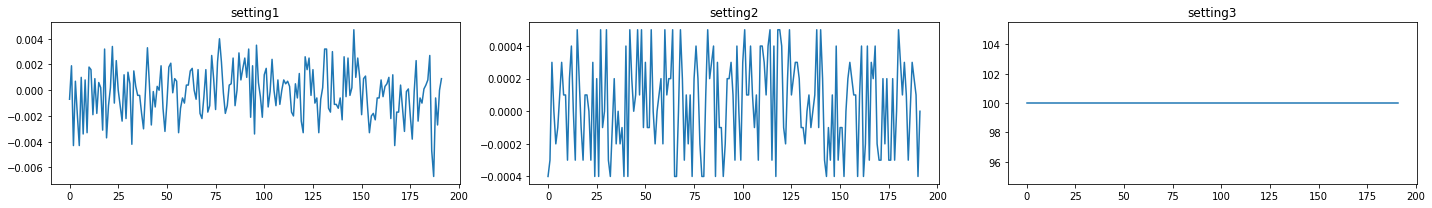

In [9]:
display_data( train_df, 1, setting_cols)

Engine: 1, Samples: 192, Features: 21


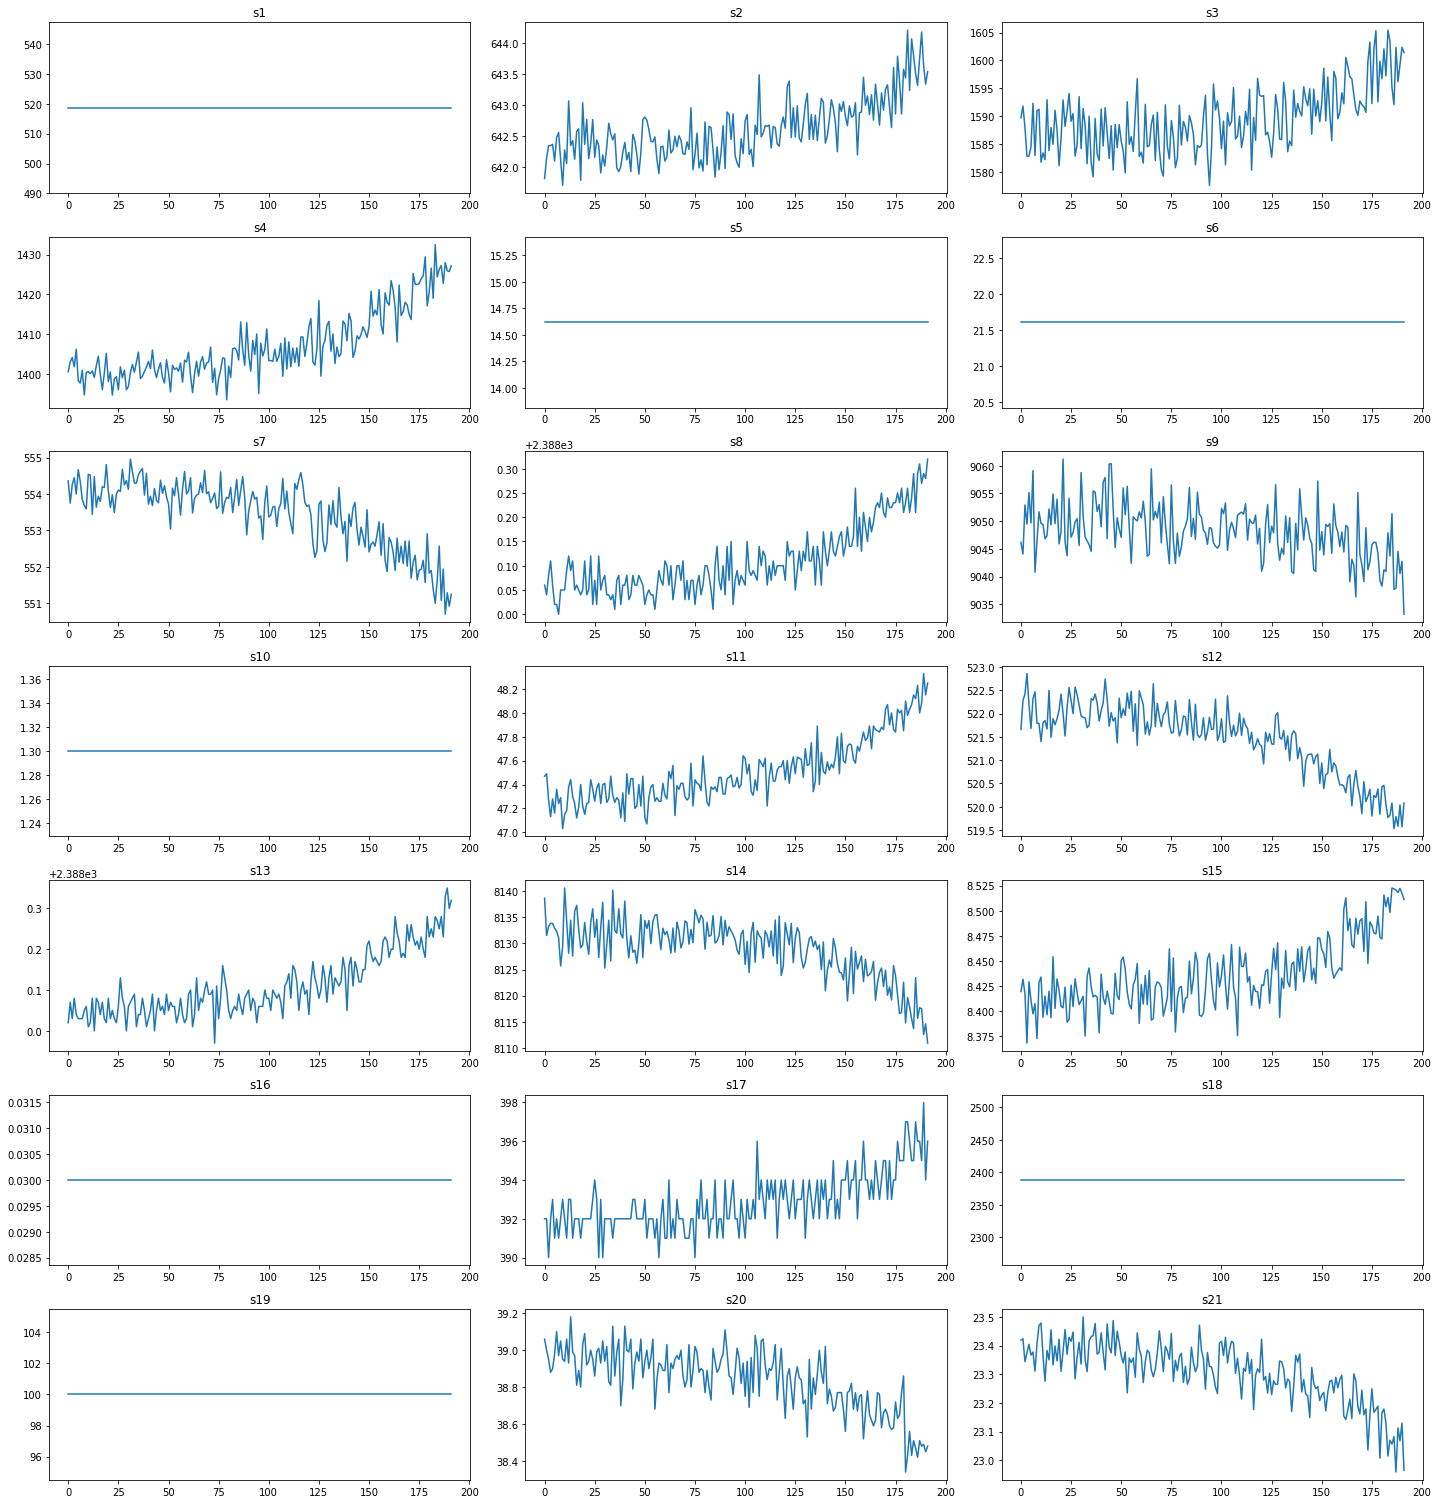

In [10]:
display_data( train_df, 1, sensor_cols)

Engine: 2, Samples: 287, Features: 21


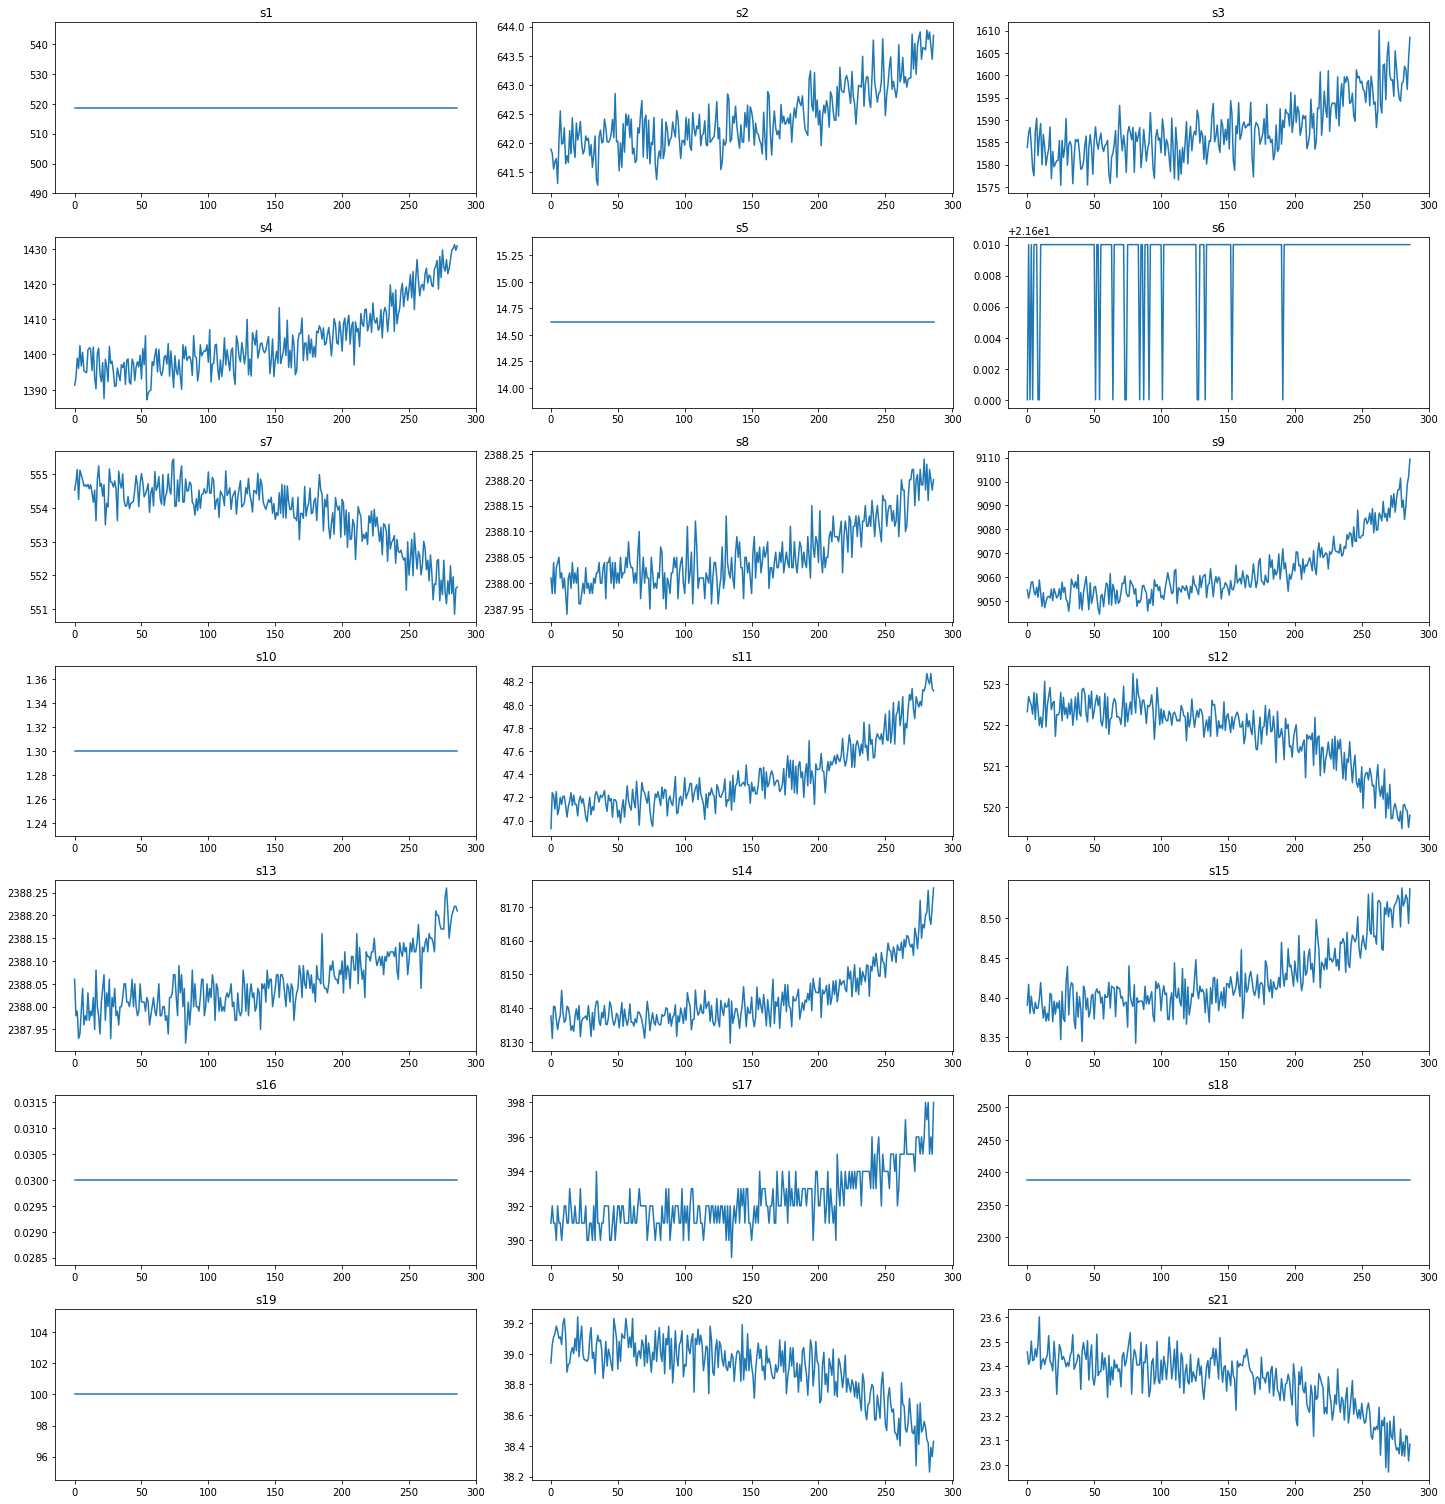

In [11]:
display_data( train_df, 2, sensor_cols)

In [12]:
def display_multiple(df, engines, col_names):
    
    engine_data = []
    
    for i in engines:
        engine_id = i+1
        engine = train_df[train_df['id'] == engine_id]
        engine_data.append(engine)
        
    # Total plots 
    n = len(col_names)
     
    nrows = n // 3
    ncols = n // nrows
    
    fig = plt.figure(figsize=(20, n))
        
    for i, m in enumerate(col_names):
        ax = plt.subplot(nrows, ncols, i+1)
        ax.set_title(m)
        
        for i in range(len(engine_data)):
            e = engine_data[i]
            x = np.arange(e.shape[0])
            y = e[m].values
            ax.plot(x, y)
    
    plt.tight_layout()
    plt.show()  

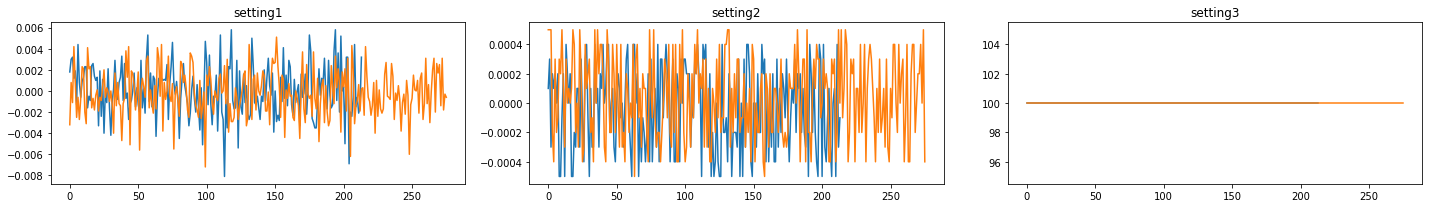

In [13]:
# Compare 10 random engines

engine_ids = random.sample(range(1,num_engines), 2)
display_multiple( train_df, engine_ids, setting_cols)

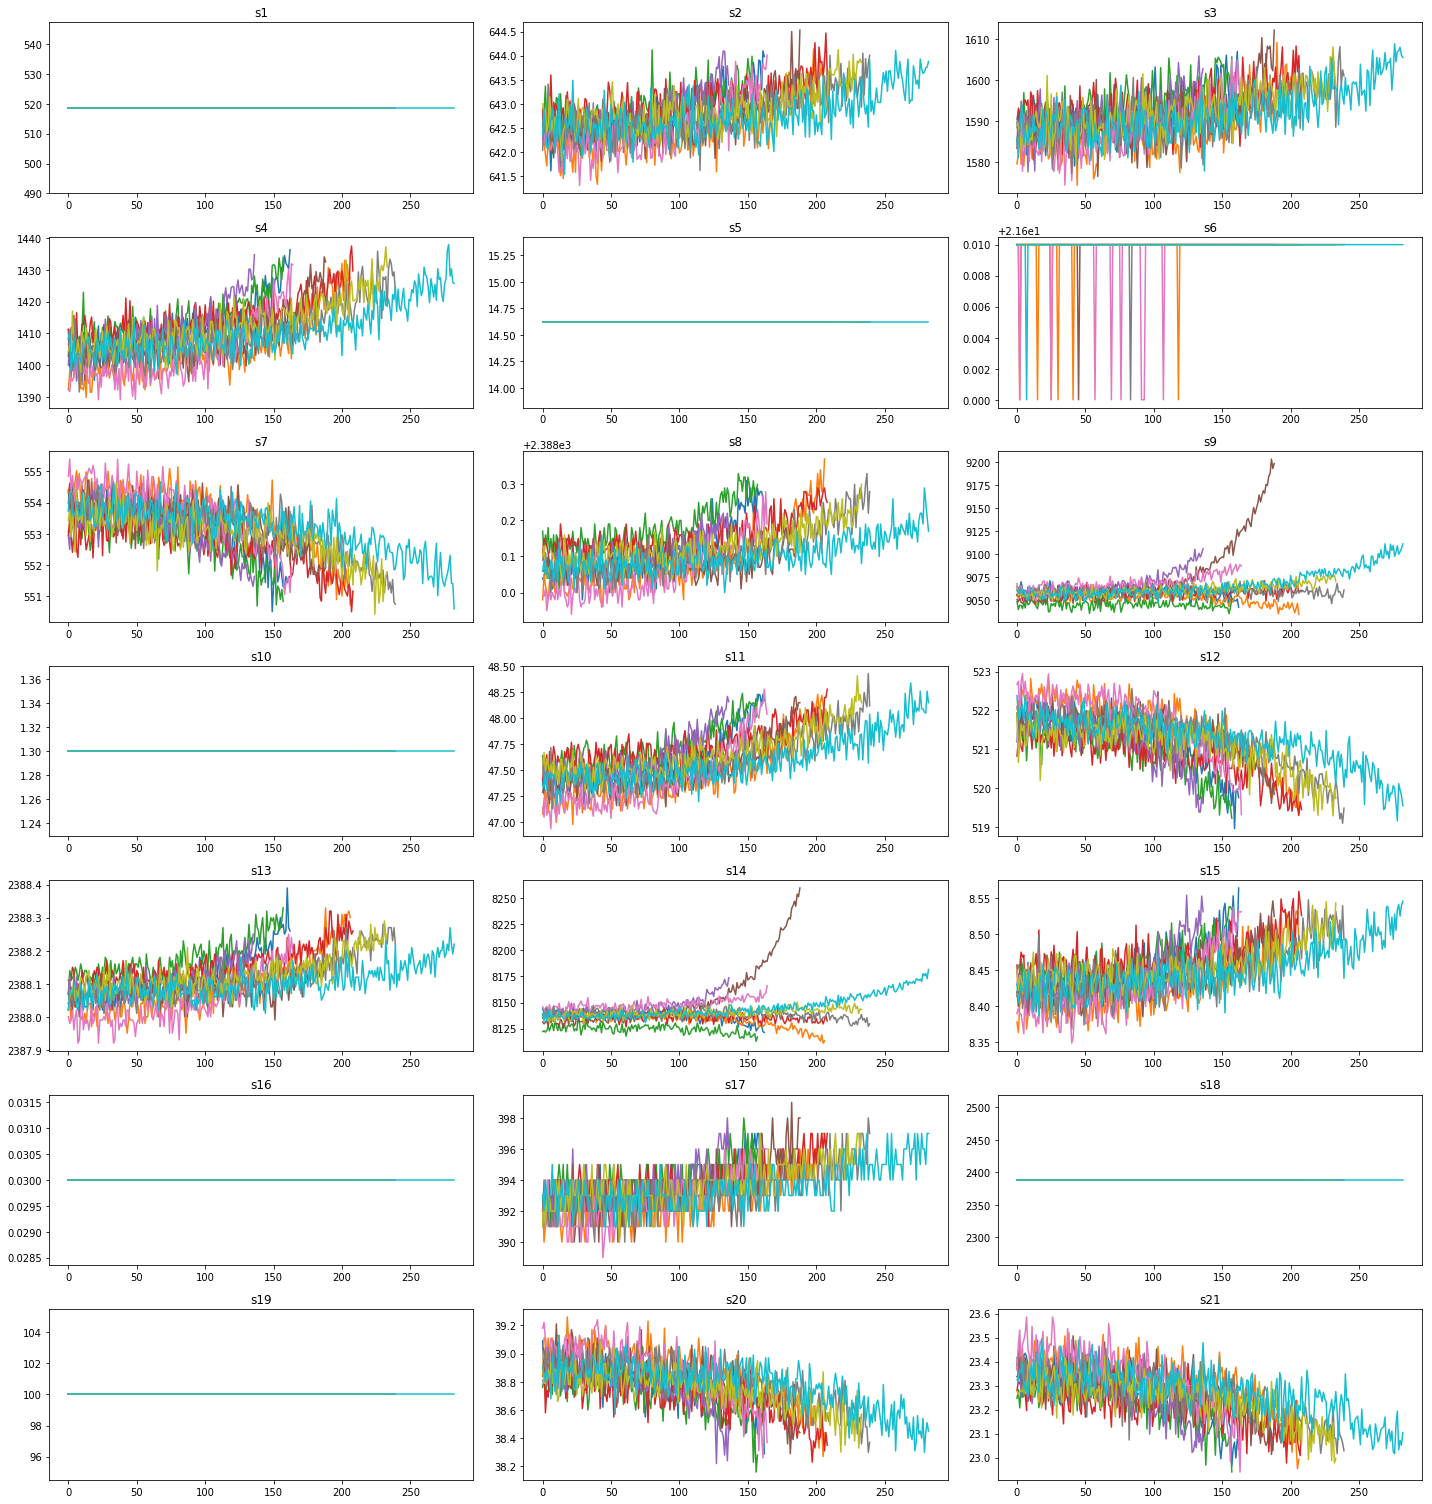

In [14]:
# Compare 10 random engines

engine_ids = random.sample(range(1,num_engines), 10)
display_multiple( train_df, engine_ids, sensor_cols)

Get features for the end of the cycle, select engines at random

(100, 26)


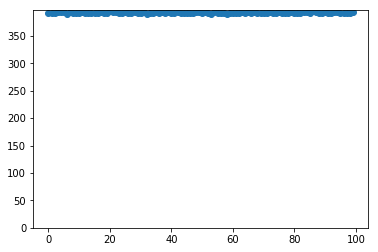

In [15]:
engine_end = train_df[train_df['cycle'] == 1]
print( engine_end.shape)
engine_end.head()

x_data = np.arange(engine_end.shape[0])

plt.scatter(x_data, engine_end['s17'])
plt.ylim(0)
plt.show()

### Examine the test data

In [16]:
test_x_df = pd.read_csv(DATA_DIR+'test_x.csv', header=None)

test_x_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

test_y_df = pd.read_csv(DATA_DIR+'test_y.csv', header=None)
test_y_df.columns = ['rul']

test_by_engine = test_x_df.groupby(['id']).count()

# GroupBy will make the id the index, reverse that 
test_by_engine.reset_index(inplace=True)

# Confirm the number of engines matches that available RUL data (test_y)
assert test_by_engine.shape[0] == test_y_df.shape[0]

In [17]:
test_by_engine.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
1,2,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
2,3,126,126,126,126,126,126,126,126,126,...,126,126,126,126,126,126,126,126,126,126
3,4,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
4,5,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98


In [18]:
# Count the number of engines
num_engines = test_x_df.groupby(['id']).count().shape[0]
print("Number of test engines: ", num_engines)

Number of test engines:  100


In [19]:
# Just keep the count and the RUL to compare
diff = test_by_engine[['id','cycle']]
diff['rul'] = test_y_df['rul']

/home/centos/anaconda3/envs/default/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
diff.head()

,id,cycle,rul
0,1,31,112
1,2,49,98
2,3,126,69
3,4,106,82
4,5,98,91


In [21]:
diff[ diff['cycle']> diff['rul']].shape[0]

69

Of the 100 engines in the test data, 69 cycles lengths exceed the RUL entry. ??? Not clear the implication of this.

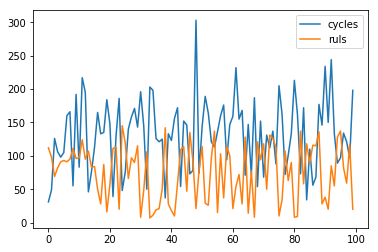

In [22]:
cycles = diff['cycle'].values
ruls = diff['rul'].values

x = np.arange(len(cycles))

plt.plot(x, cycles, label="cycles")
plt.plot(x, ruls, label="ruls")

plt.legend()
plt.show()

In [23]:
def display_test_data( df, id, cols):
    rul = diff[ diff['id'] == id]['rul'].values[0]
    print("RUL: ", rul)
    display_data( df, id, cols, rul)

RUL:  112
Engine: 1, Samples: 31, Features: 21


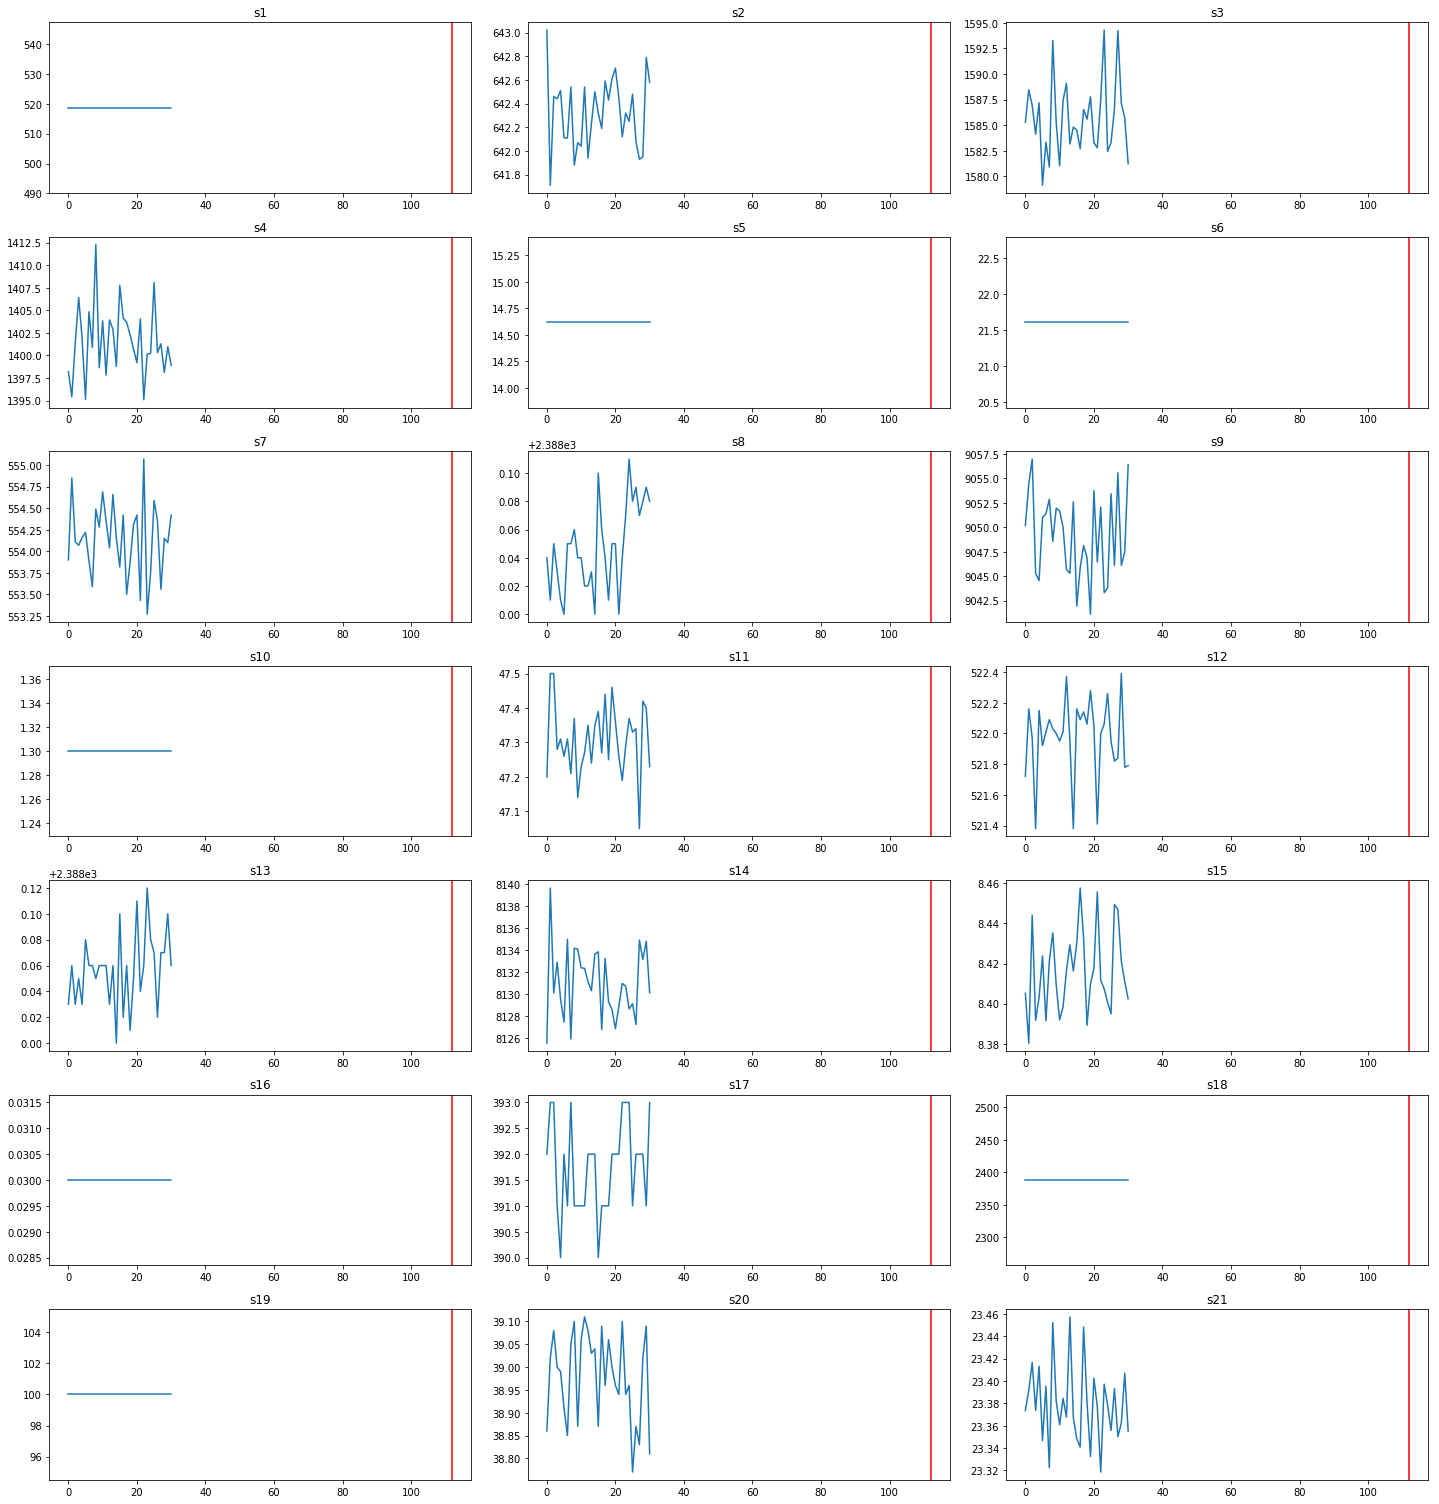

In [24]:
display_test_data(test_x_df, 1, sensor_cols)

RUL:  69
Engine: 3, Samples: 126, Features: 21


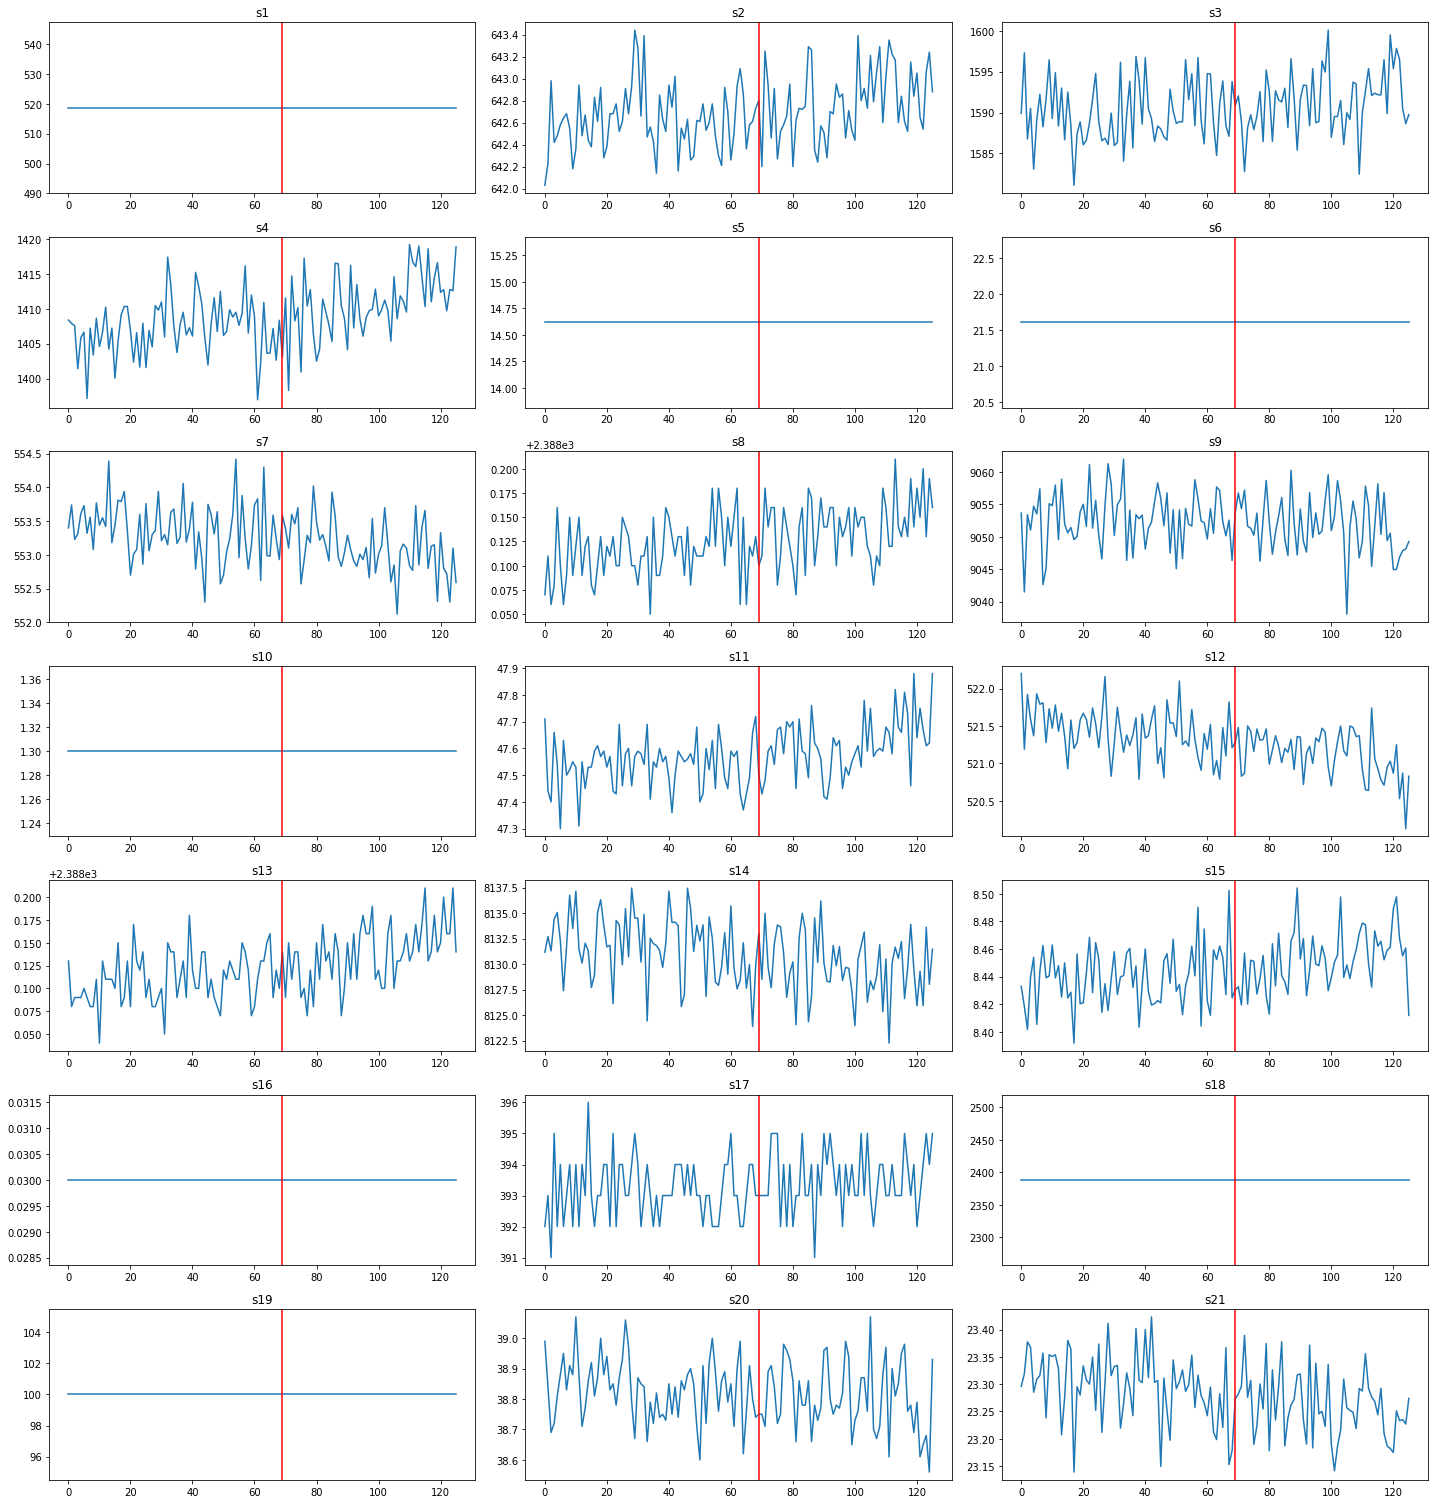

In [25]:
display_test_data(test_x_df, 3, sensor_cols)

RUL:  20
Engine: 100, Samples: 198, Features: 21


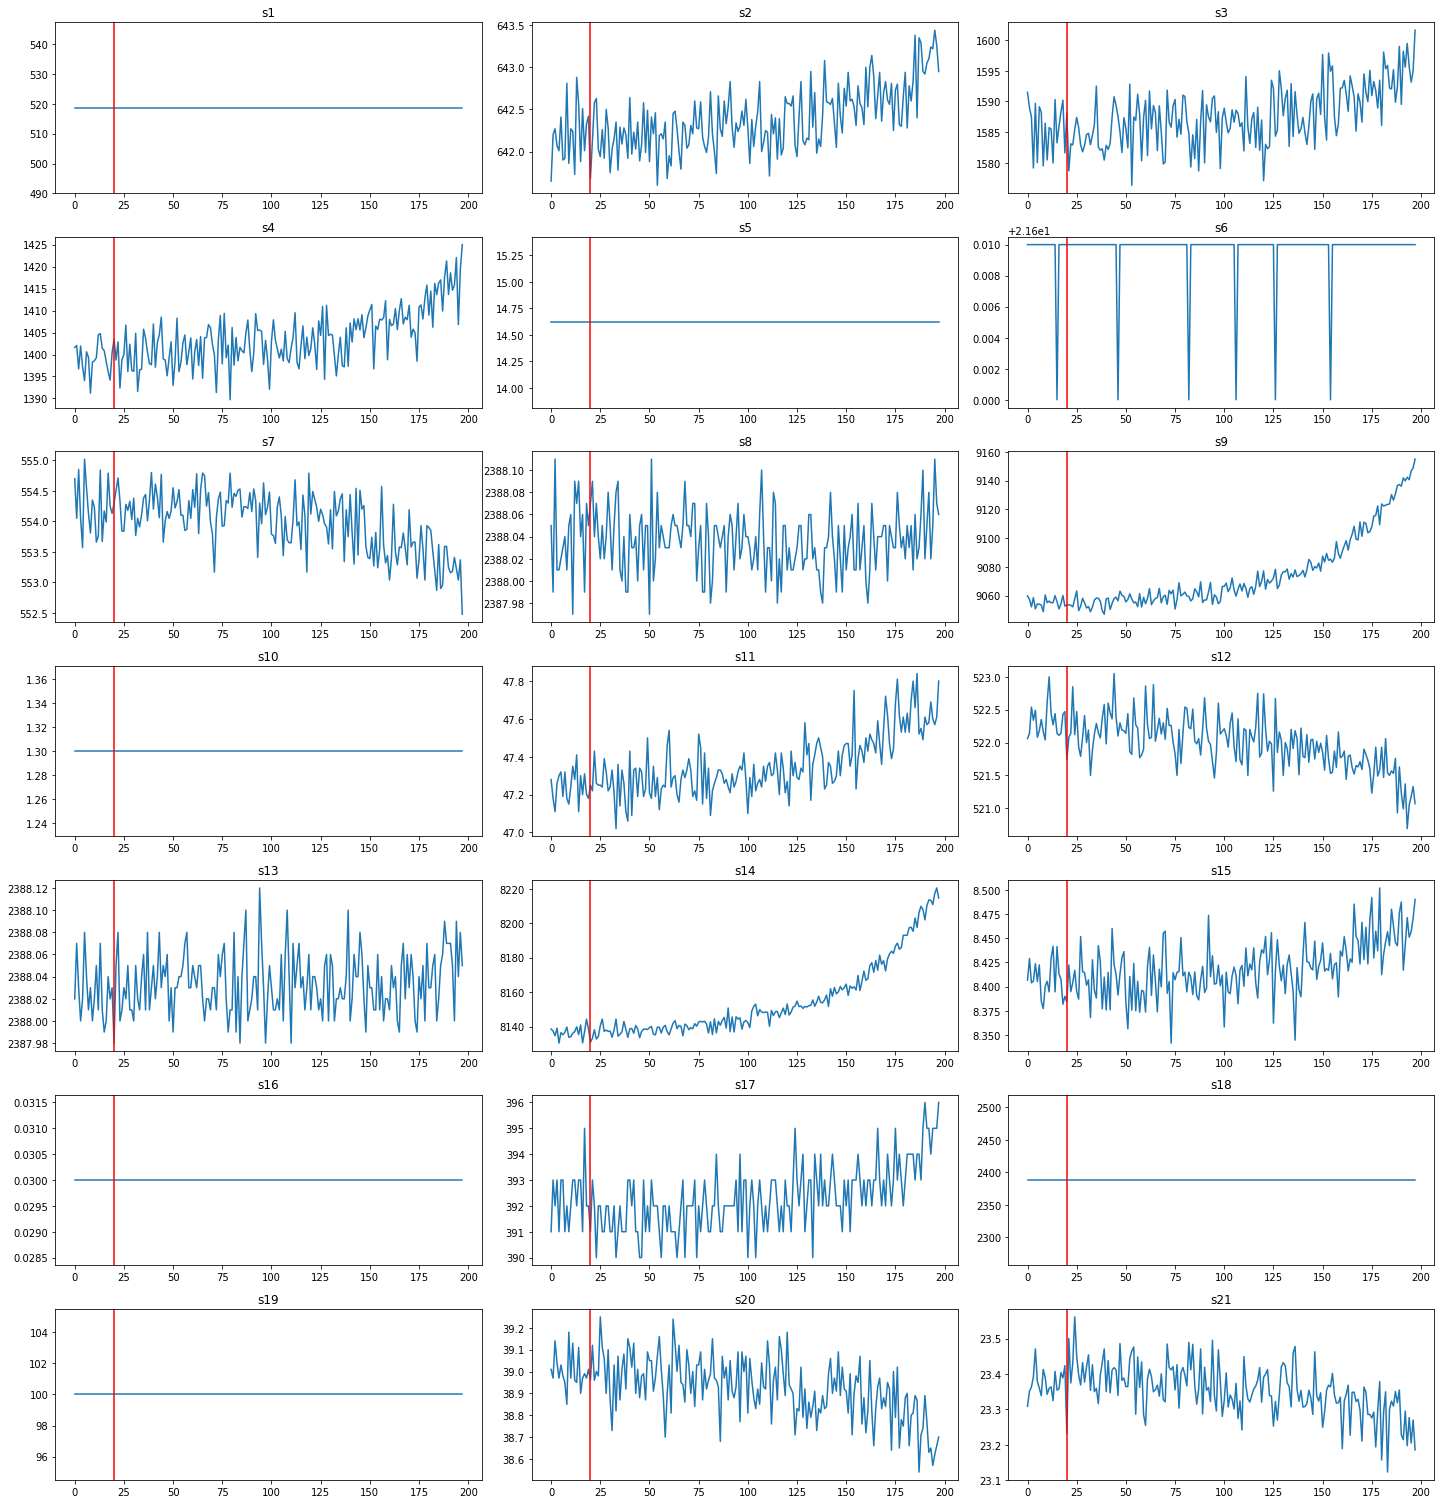

In [26]:
display_test_data(test_x_df, 100, sensor_cols)